## 기초 모듈 불러오기

In [1]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from soynlp.normalizer import *
from hanspell import spell_checker
from konlpy.tag import Okt

# ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


##### 시각화 한글화 

In [2]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import koreanize_matplotlib 
path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul set complete in your MAC!")
    rc("font", family = "Arial Unicode MS")
    
elif platform.system() == "Windows":
    print("Hangul set complete in your Windows!")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family = font_name)

else:
    print("Unknown your system....")
    
plt.rcParams["axes.unicode_minus"] = False

def seaborn_Hangul():
    ## seaborn 한글
    plt.rc("font", family = "Malgun Gothic")
    sns.set(font="Malgun Gothic", 
    rc={"axes.unicode_minus":False}, style='white')
seaborn_Hangul();

Hangul set complete in your Windows!


## 리뷰 전처리 데이터 가져오기

In [3]:
# 파일 불러오기

review_df = pd.read_csv('./MK_review_proceed_data.csv', encoding='utf-8', index_col=0) # df_review는 전체년도 리뷰 크롤링 파일
review_df.head()

,date,review,tokenized_review,tokenized_removed_review,reviews_for_vectorize,noun_tokenized_review,noun_tokenized_removed_review,noun_reviews_for_vectorize,rating,label
0,2023-09-10,상세 설명에 들어가지 않아도 검색 결과에서 중량과 가격이 바로 확인되면 더 편리하겠습니다,"['상세', '설명', '에', '들어가지', '않아도', '검색', '결과', '...","['상세', '설명', '들어가지', '않아도', '검색', '결과', '중량', ...",상세 설명 들어가지 않아도 검색 결과 중량 가격 확인 되면 더 편리하겠습니다,"['상세', '설명', '검색', '결과', '중량', '가격', '바로', '확인...","['상세', '설명', '검색', '결과', '중량', '가격', '확인', '더']",상세 설명 검색 결과 중량 가격 확인 더,5,1.0
1,2023-09-09,필터 기능 잘 되어있어 편하게 쇼핑함,"['필터', '기능', '잘', '되어있어', '편하게', '쇼핑', '함']","['필터', '기능', '잘', '되어있어', '편하게', '쇼핑', '함']",필터 기능 잘 되어있어 편하게 쇼핑 함,"['필터', '기능', '쇼핑', '함']","['필터', '기능', '쇼핑', '함']",필터 기능 쇼핑 함,5,1.0
2,2023-09-09,배송이 빨라요 그리고 할인이 많아요,"['배송', '이', '빨라요', '그리고', '할인', '이', '많아요']","['배송', '빨라요', '할인', '많아요']",배송 빨라요 할인 많아요,"['배송', '할인']","['배송', '할인']",배송 할인,5,1.0
3,2023-09-09,50퍼 쿠폰 만원 빵빵하게 주는 곳 처음 봄 주문하면 6시간 만에 옴 이 앱 뭐지,"['50', '퍼', '쿠폰', '만원', '빵빵', '하게', '주는', '곳',...","['50', '퍼', '쿠폰', '만원', '빵빵', '하게', '주는', '곳',...",50 퍼 쿠폰 만원 빵빵 하게 주는 곳 처음 봄 주문 하면 6시간 만에 옴 앱 뭐,"['쿠폰', '만원', '빵빵', '곳', '처음', '봄', '주문', '옴', ...","['쿠폰', '만원', '빵빵', '곳', '처음', '봄', '주문', '옴', ...",쿠폰 만원 빵빵 곳 처음 봄 주문 옴 앱 뭐,5,1.0
4,2023-09-09,빠른 배송,"['빠른', '배송']","['빠른', '배송']",빠른 배송,['배송'],['배송'],배송,5,1.0


In [9]:
tmp_df = review_df.iloc[:,[0,1,8,9]]
tmp_df

,date,review,rating,label
0,2023-09-10,상세 설명에 들어가지 않아도 검색 결과에서 중량과 가격이 바로 확인되면 더 편리하겠습니다,5,1.0
1,2023-09-09,필터 기능 잘 되어있어 편하게 쇼핑함,5,1.0
2,2023-09-09,배송이 빨라요 그리고 할인이 많아요,5,1.0
3,2023-09-09,50퍼 쿠폰 만원 빵빵하게 주는 곳 처음 봄 주문하면 6시간 만에 옴 이 앱 뭐지,5,1.0
4,2023-09-09,빠른 배송,5,1.0
...,...,...,...,...
12942,2016-03-02,모바일로 쉽게 살 수 있어서,5,1.0
12943,2016-03-02,아이를 키우며 좋은 식자재에 대한 갈증이 있는데 이렇게 건강하고 신선한 먹거리를 ...,5,1.0
12944,2016-03-02,아는 동생 소개로 알게 된 마켓 컬리 늦게 안 게 아쉬울 정도 제품퀄리티완젼좋고포장...,5,1.0
12945,2016-03-02,샛별 배송 정말 훌륭합니다 컬리라면 무조건 믿고 주문,5,1.0


In [10]:
tmp_df[tmp_df['rating'] <= 2]

,date,review,rating,label
9,2023-09-08,아니 컬리 팜 초대해도 안 열리던데,1,0.0
21,2023-09-06,저기요 담당 부서로 개선 요청한다고 말만 그러지 말고 제대로 운영 좀 하세요,1,0.0
41,2023-08-29,주문 알림 설정 꺼있는데 알림 와요 그리고 컬리는 오타 치면 검색 결과가 아예 ...,2,0.0
42,2023-08-28,오류가 너무 많음,1,0.0
52,2023-08-26,상품 중에 배송 불가 상품이 너무 많은데 안되면 안 된다고 표시라도 해줬으면 좋겠네...,2,0.0
...,...,...,...,...
12926,2016-03-03,화면전환할 때 렉이 너무 심하고 검색은 아예 되지를 않네요,2,0.0
12927,2016-03-03,너무 느리고 화면 전환 때 수시로 앱 먹통 돼서 종료도 안돼요 개발자부터 바꾸셔야 할 듯,1,0.0
12928,2016-03-02,모바일 페이지도 그다지 편하지는 않았는데 이건 훨씬 더 불편 인내심으로 결제까지...,1,0.0
12930,2016-03-02,아니 앱 반응이 너무 느려요다 좋은데 주문하기가 너무 힘드네요 너무 느려서 핸드폰 ...,1,0.0


In [4]:
review_df.columns

Index(['date', 'review', 'tokenized_review', 'tokenized_removed_review',
       'reviews_for_vectorize', 'noun_tokenized_review',
       'noun_tokenized_removed_review', 'noun_reviews_for_vectorize', 'rating',
       'label'],
      dtype='object')

리뷰 -> 토큰화 -> 불용어 처리 -> 벡터화 사전작업
```
review 
    -> tokenized_review  (명사+형태소)
        -> tokenized_removed_review
            -> reviews_for_vectorize
            
    -> noun_tokenized_review  (명사)
        -> noun_tokenized_removed_review
            -> noun_reviews_for_vectorize
```

## 명사 + 형태소 기준으로 작업

##### 말뭉치 만들기

In [5]:
## 말뭉치 만들기

import ast

nouns_list = []

for tokens in review_df['tokenized_removed_review']:
    
    nouns_list.extend(ast.literal_eval(tokens))
    
nouns_list_set = list(set(nouns_list))
print('토큰화 말뭉치 개수 :',len(nouns_list))
print('중복을 제거한 말뭉치 개수 :',len(nouns_list_set))

토큰화 말뭉치 개수 : 122378
중복을 제거한 말뭉치 개수 : 12527


In [7]:
nouns_list[:10]

['상세', '설명', '들어가지', '않아도', '검색', '결과', '중량', '가격', '확인', '되면']

In [6]:
nouns_list_set[:10]

['도시', '퀀리티', '움', '이럼', '없겠지라고', '편하기도', '쑥쑥', '베사', '올리겠습니다', '있는데요']

### 로지스틱 베스트 모델
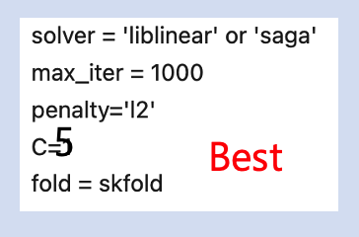

In [9]:
# 말뭉치 기준 벡터화
tfidf_vectorizer = TfidfVectorizer(min_df=10, decode_error='ignore',vocabulary=nouns_list_set) # max_features=3000

contents_for_vectorize = review_df['reviews_for_vectorize']
X = tfidf_vectorizer.fit_transform(contents_for_vectorize)
X.shape

(11321, 12527)

In [10]:
y = review_df['label']
y.shape

(11321,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

Logistic_reg = LogisticRegression(C=5, max_iter=1000, solver='saga', penalty='l2', random_state=13)
Logistic_reg.fit(X_train, y_train)

y_pred_tr = Logistic_reg.predict(X_train)
y_pred_test = Logistic_reg.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9717314487632509
Test Acc :  0.9143361789814543


## 오즈비 추출

In [13]:
# 학습 결과 선형 계수
Logistic_reg.coef_

array([[ 0.22515502,  0.        ,  0.        , ...,  0.03121876,
        -0.07951363, -0.25428334]])

In [18]:
# row 생략 없이 출력
#pd.set_option('display.max_rows', None)
# col 생략 없이 출력
#pd.set_option('display.max_columns', None)

# 키워드와 선형계수
df_keywords = pd.DataFrame(Logistic_reg.coef_, columns=tfidf_vectorizer.get_feature_names_out()).transpose()
df_keywords = df_keywords.rename(columns={0:'coef'})
df_keywords = df_keywords.sort_values(by='coef', ascending=False)

# 오즈비 추가
df_keywords['odds'] = [ np.exp(coeff) for coeff in df_keywords['coef']]
df_keywords.head()

,coef,odds
편하고,5.229586,186.715575
좋은,4.668544,106.542472
최고,4.622766,101.775141
편해요,4.595277,99.015523
만족합니다,4.585333,98.035814


## 오즈비 vs 빈도수 표로 비교

In [19]:
## display 옆으로 여러개 띄우기
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [24]:
top10_pos_odds = df_keywords.iloc[:10]
top10_neg_odds = df_keywords.iloc[-10:]

print('--------상위--------', '---------하위--------')
display_side_by_side(top10_pos_odds.sort_values(by='odds', ascending=False, ignore_index=True),
                     top10_neg_odds.sort_values(by='odds', ascending=True,ignore_index=True))

--------상위-------- ---------하위--------


,coef,odds
0,5.229586,186.715575
1,4.668544,106.542472
2,4.622766,101.775141
3,4.595277,99.015523
4,4.585333,98.035814
5,4.218113,67.905229
6,3.849872,46.987049
7,3.820693,45.635800
8,3.728983,41.636756
9,3.542582,34.556037


## 말뭉치의 빈도수

In [28]:
from collections import Counter

counts_nouns_list = Counter(nouns_list)
counts_nouns_df = pd.DataFrame.from_dict([counts_nouns_list]).T
counts_nouns_df.columns = ['count']
counts_nouns_df.head(5)

,count
상세,68
설명,122
들어가지,1
않아도,22
검색,278


In [29]:
## 빈도수 10개 이하 버리기 (벡터화 시킬때 10 이상으로 뽑음!!!!!!)

counts_nouns_df = counts_nouns_df[counts_nouns_df['count'] >= 10]
counts_nouns_df.head(5)

,count
상세,68
설명,122
않아도,22
검색,278
결과,23


In [31]:
print('---상위---', '----하위-----')
display_side_by_side(counts_nouns_df.sort_values(by='count', ascending=False).head(10),
                     counts_nouns_df.sort_values(by='count', ascending=True).head(10))

---상위--- ----하위-----


,count
배송,3201
상품,1631
너무,1568
앱,1355
컬리,1270
주문,1148
사용,1141
제품,1071
잘,1047
마켓,869


## 오즈비 vs 빈도수 

In [34]:
print('--------------긍정--------------', '--------------부정--------------')
print('--------------------------------', '--------------------------------')

display_side_by_side(top10_pos_odds.sort_values(by='odds', ascending=False),
                     counts_nouns_df.sort_values(by='count', ascending=False).head(10),
                     top10_neg_odds.sort_values(by='odds', ascending=True),
                    counts_nouns_df.sort_values(by='count', ascending=True).head(10))

--------------긍정-------------- --------------부정--------------
-------------------------------- --------------------------------


,coef,odds
편하고,5.229586,186.715575
좋은,4.668544,106.542472
최고,4.622766,101.775141
편해요,4.595277,99.015523
만족합니다,4.585333,98.035814
좋습니다,4.218113,67.905229
아주,3.849872,46.987049
신선하고,3.820693,45.635800
있어,3.728983,41.636756
감사합니다,3.542582,34.556037


- 빈도수가 긍정이냐 부정이냐를 판단할 수는 없다
```
긍정에 '배송'이 많으면 긍정으로 학습될 것이고
부정에 '배송'이 많으면 부정으로 학습되는 것이지 
"빈도수가 많으면 긍정! 빈도수가 적으면 부정!"이 아니다.
```
- 빈도수가 많으면 학습에 도움이 되는 것 뿐!

In [36]:
print('--------------긍정--------------', '--------------부정--------------')
print('--------------------------------', '--------------------------------')

display_side_by_side(top10_pos_odds.sort_values(by='odds', ascending=False),
                     top10_neg_odds.sort_values(by='odds', ascending=True),
                     counts_nouns_df.sort_values(by='count', ascending=False).head(20))


--------------긍정-------------- --------------부정--------------
-------------------------------- --------------------------------


,coef,odds
편하고,5.229586,186.715575
좋은,4.668544,106.542472
최고,4.622766,101.775141
편해요,4.595277,99.015523
만족합니다,4.585333,98.035814
좋습니다,4.218113,67.905229
아주,3.849872,46.987049
신선하고,3.820693,45.635800
있어,3.728983,41.636756
감사합니다,3.542582,34.556037
